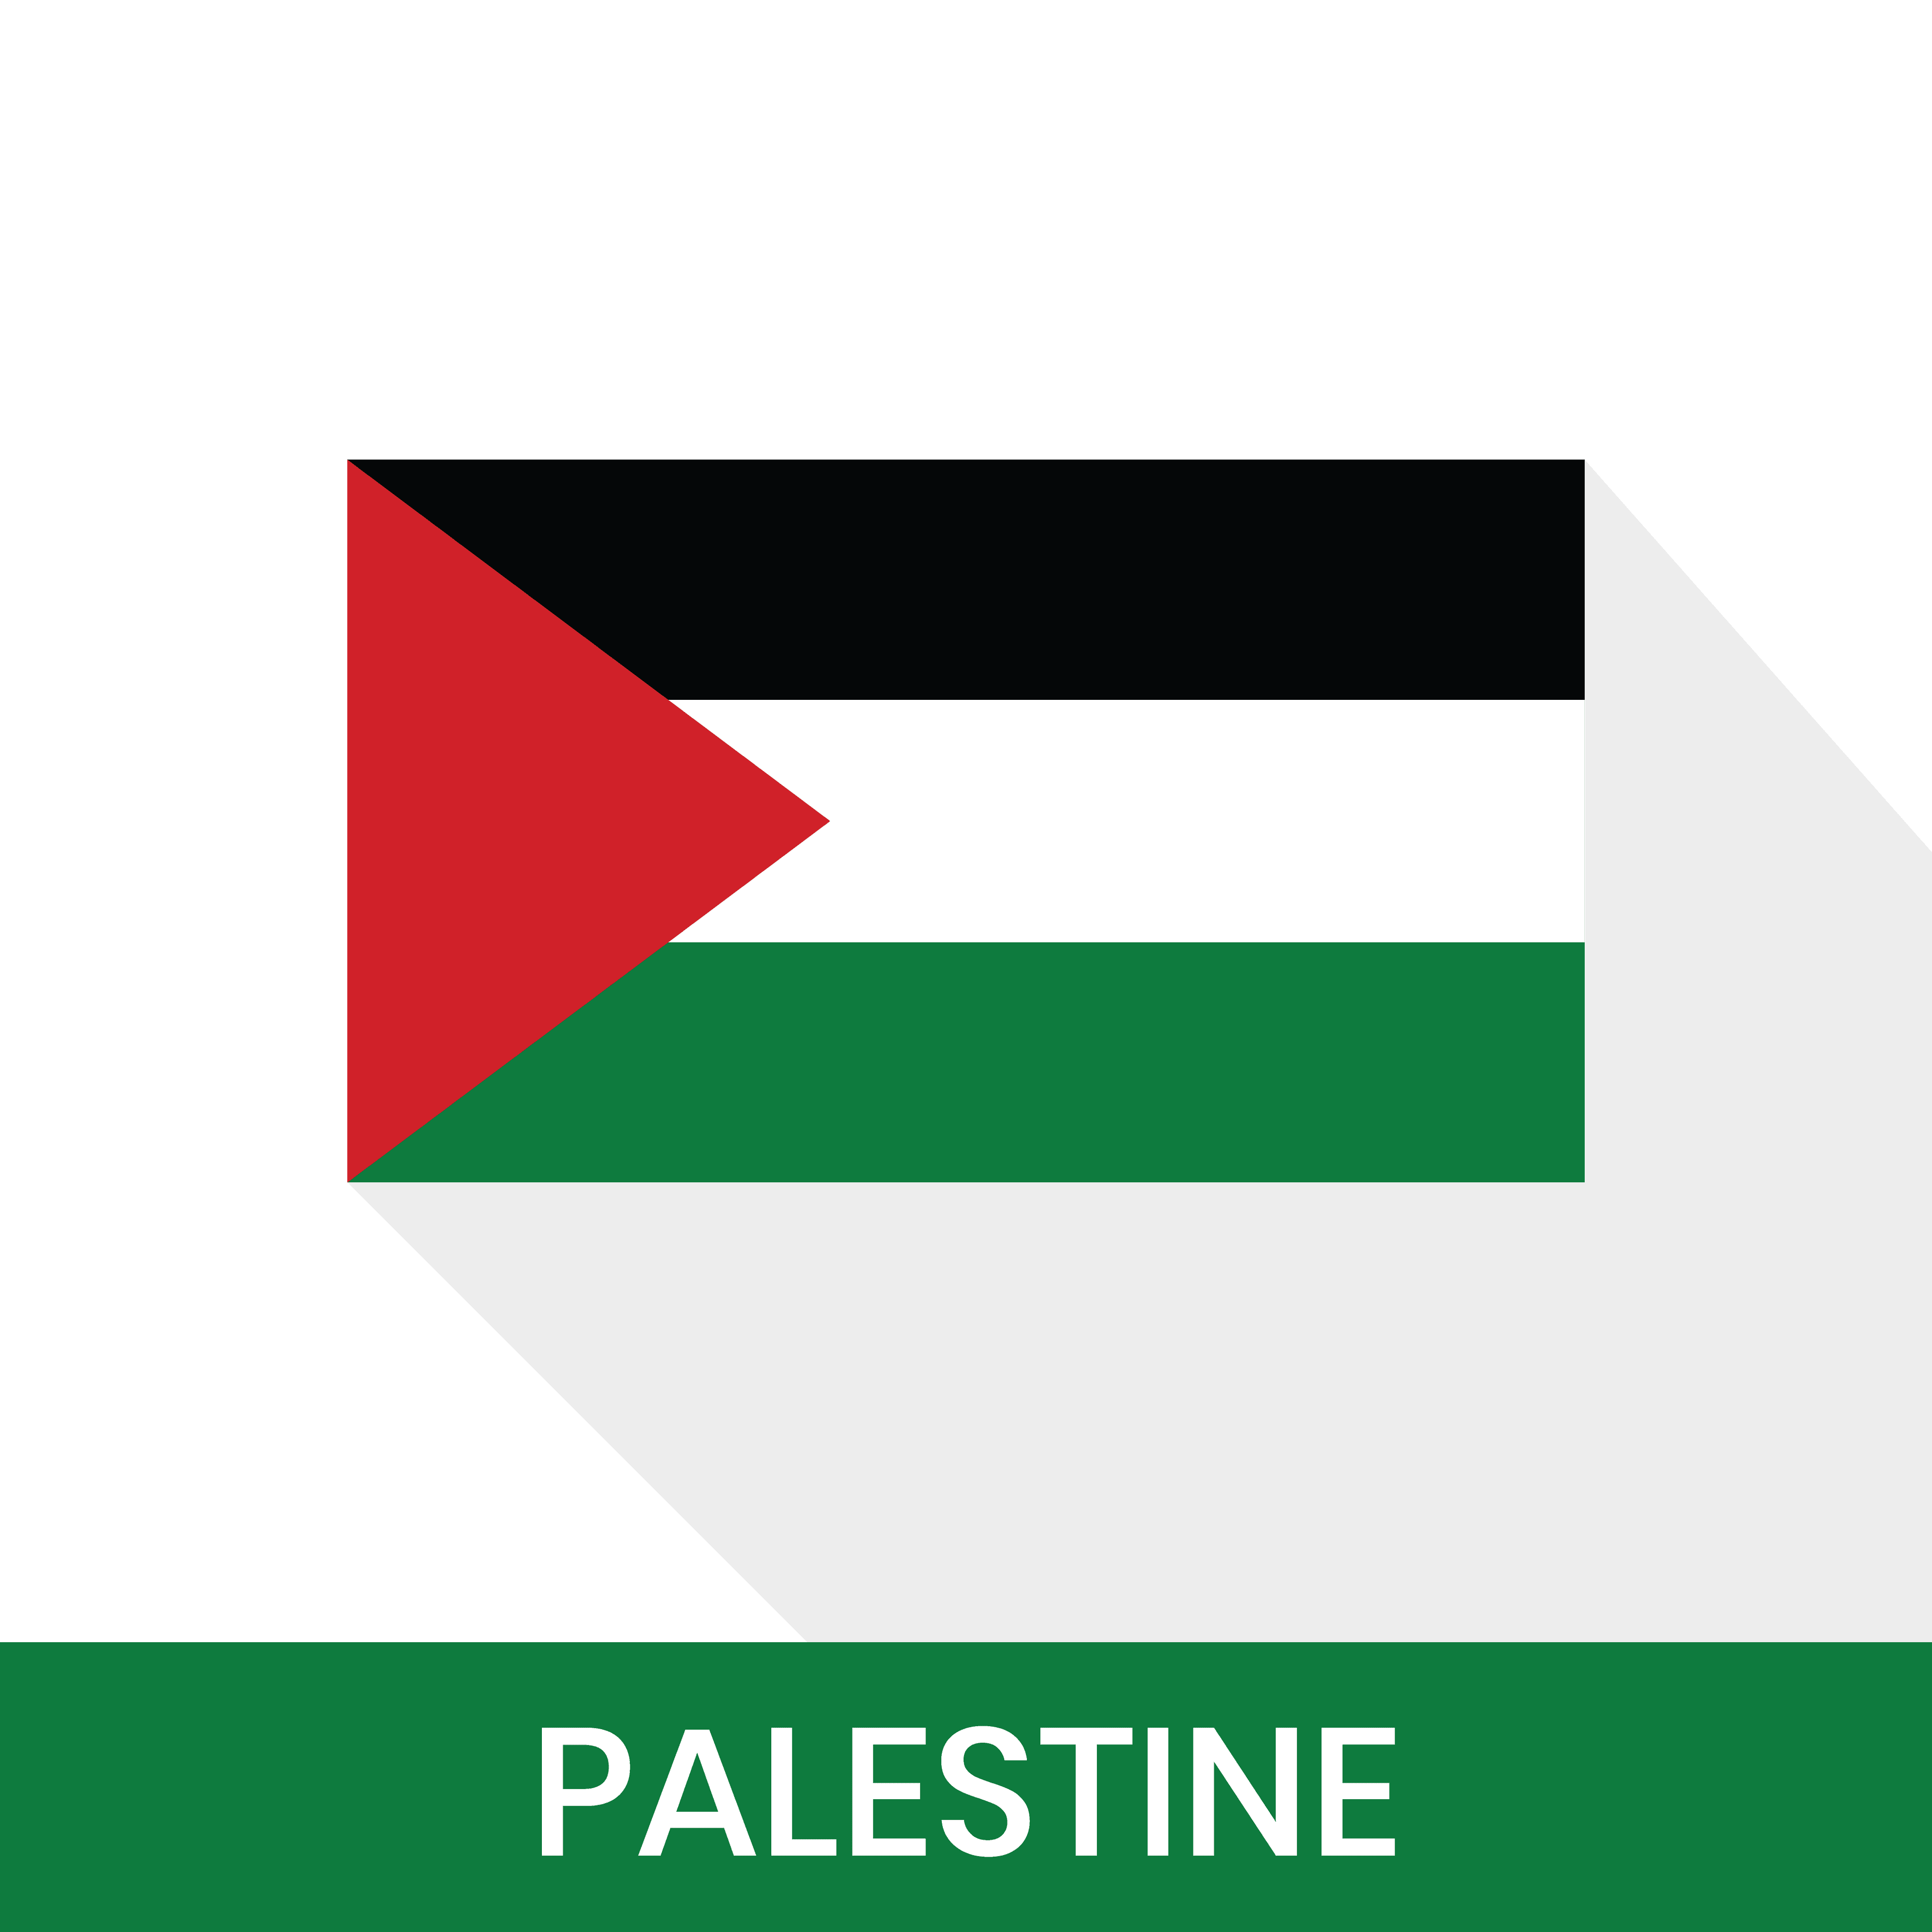

# Email Spam Detection

## EDA

In [1]:
# Load Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn import svm
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.metrics import accuracy_score as score

In [2]:
# Load Dataset
data = pd.read_csv('spam.csv',encoding = 'ISO-8859-1')
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


### Understand of Data

In [3]:
# Show Information About Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
# Show Columns
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
# Show Shape of Data
data.shape

(5572, 5)

In [6]:
# Show nunique values
data.nunique()

v1               2
v2            5169
Unnamed: 2      43
Unnamed: 3      10
Unnamed: 4       5
dtype: int64

### Data Cleanning

In [7]:
# Show Missing Values
print(data.isnull().sum(),data.isnull(),sep='\n\n')

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

         v1     v2  Unnamed: 2  Unnamed: 3  Unnamed: 4
0     False  False        True        True        True
1     False  False        True        True        True
2     False  False        True        True        True
3     False  False        True        True        True
4     False  False        True        True        True
...     ...    ...         ...         ...         ...
5567  False  False        True        True        True
5568  False  False        True        True        True
5569  False  False        True        True        True
5570  False  False        True        True        True
5571  False  False        True        True        True

[5572 rows x 5 columns]


In [8]:
# Remove Missing Values
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [9]:
# Rename Columns
data.rename(columns={'v1':'label', 'v2':'message'},inplace=True)

In [10]:
# Duplicate Data
data.duplicated().sum()
data.drop_duplicates(keep='first',inplace=True)

In [11]:
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4516   4516  Go until jurong point, crazy.. Available only ...    1
spam      653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

<Axes: >

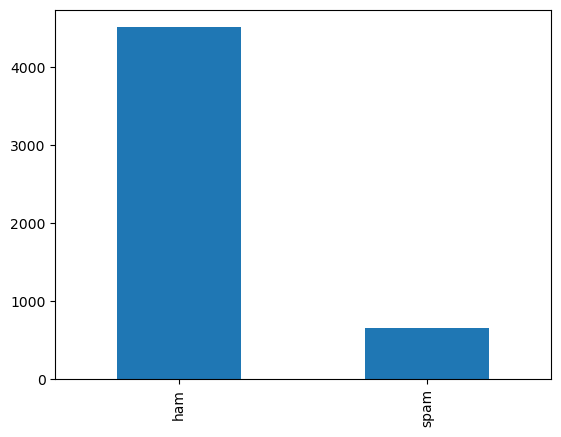

In [12]:
# Bar Chart
data['label'].value_counts().plot(kind='bar')

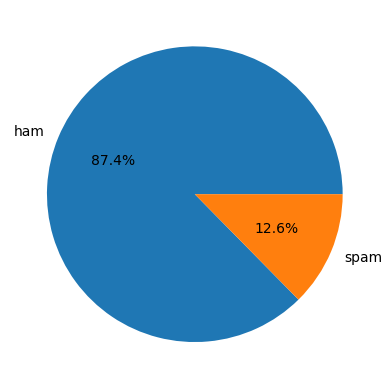

In [13]:
plt.pie(data['label'].value_counts(),labels=['ham','spam'],autopct='%1.1f%%')
plt.show()

## Machine Learning

In [14]:
encoder=LabelEncoder()
data['label']=encoder.fit_transform(data['label'])
data['label']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5169, dtype: int32

In [15]:
x=data['message']
y=data['label']

In [16]:
x_train, x_test, y_train, y_test = split(x, y, test_size=0.2, random_state=3)  #splitting data into train and test

In [17]:
cv=CountVectorizer()

In [18]:
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

In [19]:
lr=LGR() #creating model

In [20]:
lr.fit(x_train_cv,y_train)
prediction_train=lr.predict(x_train_cv)

In [21]:
print(score(y_train, prediction_train)*100)

99.75816203143893


In [22]:
prediction_test = lr.predict(x_test_cv)

In [23]:
print(score(y_test, prediction_test)*100)

97.58220502901354
